In [1]:
import os
os.chdir(r'C:/Users/User/Desktop/cdac advance modules/pml lecture/Datasets')

Part 1 - Data Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
# Importing the training set
dataset_ts = pd.read_csv('AusGas.csv')

dataset_ts.head()

,Month,GasProd
0,Jan-1956,1709
1,Feb-1956,1646
2,Mar-1956,1794
3,Apr-1956,1878
4,May-1956,2173


In [ ]:
dataset_ts.shape

(476, 2)

In [ ]:
dataset_train = dataset_ts.iloc[:450,:]
dataset_train.shape

(450, 2)

In [ ]:
training_set = dataset_train.iloc[:, 1].values
training_set[:5]

array([1709, 1646, 1794, 1878, 2173], dtype=int64)

Feature Scaling

In [ ]:
training_set = training_set.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled[:5]

array([[0.00103697],
       [0.        ],
       [0.00243605],
       [0.00381868],
       [0.00867433]])

Creating a data structure with timesteps and 1 output

In [ ]:
timesteps=50
trn_size = dataset_train.shape[0]

In [ ]:
X_train = []
y_train = []
for i in range(timesteps, trn_size):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
X_train.shape

(400, 50)

In [ ]:
X_train[:1]

array([[0.00103697, 0.        , 0.00243605, 0.00381868, 0.00867433,
        0.01111038, 0.01352997, 0.01267406, 0.00885538, 0.00781842,
        0.0052013 , 0.00294631, 0.00172828, 0.00069131, 0.00450999,
        0.00485565, 0.01094578, 0.01041907, 0.01632814, 0.01320078,
        0.01041907, 0.00850973, 0.00485565, 0.00381868, 0.0020904 ,
        0.00069131, 0.002255  , 0.00556342, 0.01060013, 0.01423775,
        0.01754617, 0.0144188 , 0.01145604, 0.00903644, 0.00469105,
        0.00434539, 0.00138263, 0.00069131, 0.00416433, 0.00572802,
        0.01145604, 0.01492906, 0.01754617, 0.01614708, 0.01180169,
        0.01094578, 0.00625473, 0.00434539, 0.00190934, 0.00278171]])

In [ ]:
y_train[:1]

array([0.00590908])

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(400, 50, 1)

Part 2 - Building the RNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
(X_train.shape[1],X_train.shape[2])

(50, 1)

Initialising the RNN

In [ ]:
model = keras.Sequential()

# Adding LSTM layers
model.add(keras.layers.LSTM(units=100,return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))
model.add(keras.layers.LSTM(units=70,return_sequences = True ))
model.add(keras.layers.LSTM(units=50 ))

# Adding the output layer
model.add(keras.layers.Dense(1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 100)           40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 70)            47880     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                24200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 112,931
Trainable params: 112,931
Non-trainable params: 0
_________________________________________________________________


Fitting the RNN to the Training set

In [ ]:
model.fit(X_train, y_train, epochs = 50, batch_size = 25)

Epoch 1/50
16/16 [==============================] - 1s 54ms/step - loss: 0.0385
Epoch 2/50
16/16 [==============================] - 1s 74ms/step - loss: 0.0080
Epoch 3/50
16/16 [==============================] - 1s 70ms/step - loss: 0.0071
Epoch 4/50
16/16 [==============================] - 1s 82ms/step - loss: 0.0062
Epoch 5/50
16/16 [==============================] - 1s 70ms/step - loss: 0.0059
Epoch 6/50
16/16 [==============================] - 1s 71ms/step - loss: 0.0059
Epoch 7/50
16/16 [==============================] - 1s 75ms/step - loss: 0.0057
Epoch 8/50
16/16 [==============================] - 1s 67ms/step - loss: 0.0056
Epoch 9/50
16/16 [==============================] - 1s 84ms/step - loss: 0.0063
Epoch 10/50
16/16 [==============================] - 1s 57ms/step - loss: 0.0056
Epoch 11/50
16/16 [==============================] - 1s 81ms/step - loss: 0.0064
Epoch 12/50
16/16 [==============================] - 1s 61ms/step - loss: 0.0055
Epoch 13/50
16/16 [==================

Part 3 - Making the predictions and visualising the results

In [ ]:
dataset_test = dataset_ts.iloc[450:,:]
dataset_test.shape

(26, 2)

In [ ]:
test_set = dataset_test.iloc[:, 1].values
test_set

array([56807, 54634, 51367, 48073, 46251, 43736, 39975, 40478, 46895,
       46147, 55011, 57799, 62450, 63896, 57784, 53231, 50354, 38410,
       41600, 41471, 46287, 49013, 56624, 61739, 66600, 60054],
      dtype=int64)

In [ ]:
dataset_total = pd.concat((dataset_train['GasProd'], dataset_test['GasProd']), axis = 0)
dataset_total

0       1709
1       1646
2       1794
3       1878
4       2173
       ...  
471    49013
472    56624
473    61739
474    66600
475    60054
Name: GasProd, Length: 476, dtype: int64

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1,1)
len(inputs)

76

In [ ]:
inputs = sc.transform(inputs)
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(26, 50, 1)

In [ ]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.9745933 ],
       [0.95209855],
       [0.879866  ],
       [0.78024197],
       [0.671218  ],
       [0.5733257 ],
       [0.5133057 ],
       [0.5040575 ],
       [0.54495275],
       [0.62787735],
       [0.73777896],
       [0.85586774],
       [0.95130026],
       [0.99382657],
       [0.97668236],
       [0.91620773],
       [0.83522856],
       [0.75307465],
       [0.6930319 ],
       [0.6711049 ],
       [0.6907506 ],
       [0.7467532 ],
       [0.8248106 ],
       [0.90181774],
       [0.94660795],
       [0.94255644]], dtype=float32)

In [ ]:
predicted_values.shape

(26, 1)

In [ ]:
predicted_values = sc.inverse_transform(predicted_values)
predicted_values

array([[60856.438],
       [59489.797],
       [55101.38 ],
       [49048.82 ],
       [42425.176],
       [36477.83 ],
       [32831.375],
       [32269.512],
       [34754.06 ],
       [39792.062],
       [46469.023],
       [53643.39 ],
       [59441.297],
       [62024.94 ],
       [60983.36 ],
       [57309.285],
       [52389.477],
       [47398.297],
       [43750.46 ],
       [42418.31 ],
       [43611.863],
       [47014.246],
       [51756.547],
       [56435.035],
       [59156.22 ],
       [58910.074]], dtype=float32)

Visualising the results

In [ ]:
%matplotlib inline

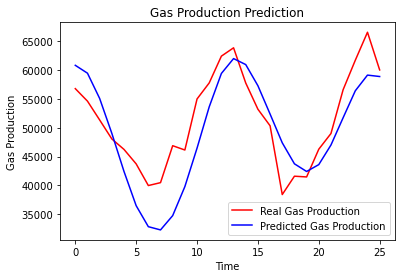

In [ ]:
plt.plot(test_set, color = 'red', label = 'Real Gas Production')
plt.plot(predicted_values, color = 'blue', label = 'Predicted Gas Production')
plt.title('Gas Production Prediction')
plt.xlabel('Time')
plt.ylabel('Gas Production')
plt.legend()
plt.show()

Root Mean Square Error

In [ ]:
print(np.sqrt(mean_squared_error(predicted_values,test_set)))

5435.620609168732
